In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

## Data Reading and Understanding

In [3]:
lead = pd.read_csv('Leads.csv')
pd.set_option('display.max_columns',None)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead.shape

(9240, 37)

In [5]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [8]:
lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [9]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
(lead.isnull().sum()*100.0/9240).sort_values(ascending=True)

Prospect ID                                       0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
Magazine                                          0.000000
Search                                            0.000000
Newspaper Article                                 0.000000
Last Notable Activity                             0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Total Time Spent on Website                       0.0000

In [11]:
#### Dropping columns that are not important and highly correlated to one another

In [12]:
var1 = ['Prospect ID', 'Do Not Call', 'Country', 'Last Activity','Search', 'Magazine','Newspaper Article',
                        'Newspaper','X Education Forums', 'Digital Advertisement', 'Through Recommendations',
                        'Receive More Updates About Our Courses', 'How did you hear about X Education', 'Lead Number',
                        'Last Activity', 'Get updates on DM Content','Update me on Supply Chain Content',
                        'I agree to pay the amount through cheque']

lead.drop(columns=var1,inplace=True)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Select,Unemployed,Better Career Prospects,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Select,Unemployed,Better Career Prospects,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Select,Unemployed,Better Career Prospects,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [13]:
## Dropping columnns that have high percent of null values  that is greater than 30%

In [14]:
null = (lead.isnull().sum()*100.0/9240).sort_values(ascending=True)
null

Lead Origin                                       0.000000
A free copy of Mastering The Interview            0.000000
Total Time Spent on Website                       0.000000
Last Notable Activity                             0.000000
Do Not Email                                      0.000000
Converted                                         0.000000
Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
City                                             15.367965
Specialization                                   15.562771
What is your current occupation                  29.112554
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.6493

In [15]:
var2 = null[null>30]
var2.index

Index(['Tags', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'Lead Quality'],
      dtype='object')

In [16]:
lead.drop(columns = var2.index, inplace = True)

In [17]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Select,Unemployed,Better Career Prospects,Select,Select,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Select,Unemployed,Better Career Prospects,Select,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Better Career Prospects,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Better Career Prospects,Select,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Select,Unemployed,Better Career Prospects,Select,Mumbai,No,Modified


In [18]:
lead.isnull().sum()*100.0/9240

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Specialization                                   15.562771
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
City                                             15.367965
A free copy of Mastering The Interview            0.000000
Last Notable Activity                             0.000000
dtype: float64

In [19]:
lead = lead[~pd.isnull(lead['What is your current occupation'])]

In [20]:
lead = lead[~pd.isnull(lead['TotalVisits'])]

In [21]:
lead = lead[~pd.isnull(lead['Lead Source'])]

In [22]:
lead = lead[~pd.isnull(lead['Specialization'])]

In [23]:
lead = lead[~pd.isnull(lead['Lead Profile'])]

In [24]:
lead.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Lead Profile                                     0
City                                             0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64

In [25]:
lead.shape

(6372, 14)

In [26]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [27]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6372.000000,6372.000000,6372.000000,6372.000000
mean,0.481011,3.606717,535.279190,2.479565
std,0.499678,4.852274,565.402288,2.166345
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,34.000000,1.000000
50%,0.000000,3.000000,287.000000,2.000000
75%,1.000000,5.000000,1022.250000,3.500000
max,1.000000,251.000000,2272.000000,55.000000


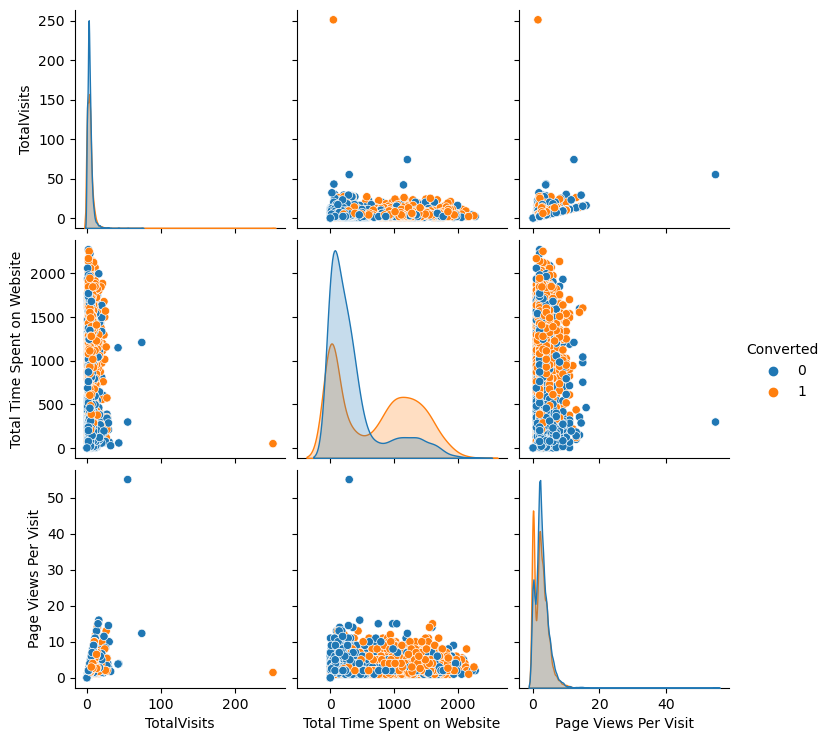

In [28]:
sns.pairplot(lead, hue='Converted')
plt.show()

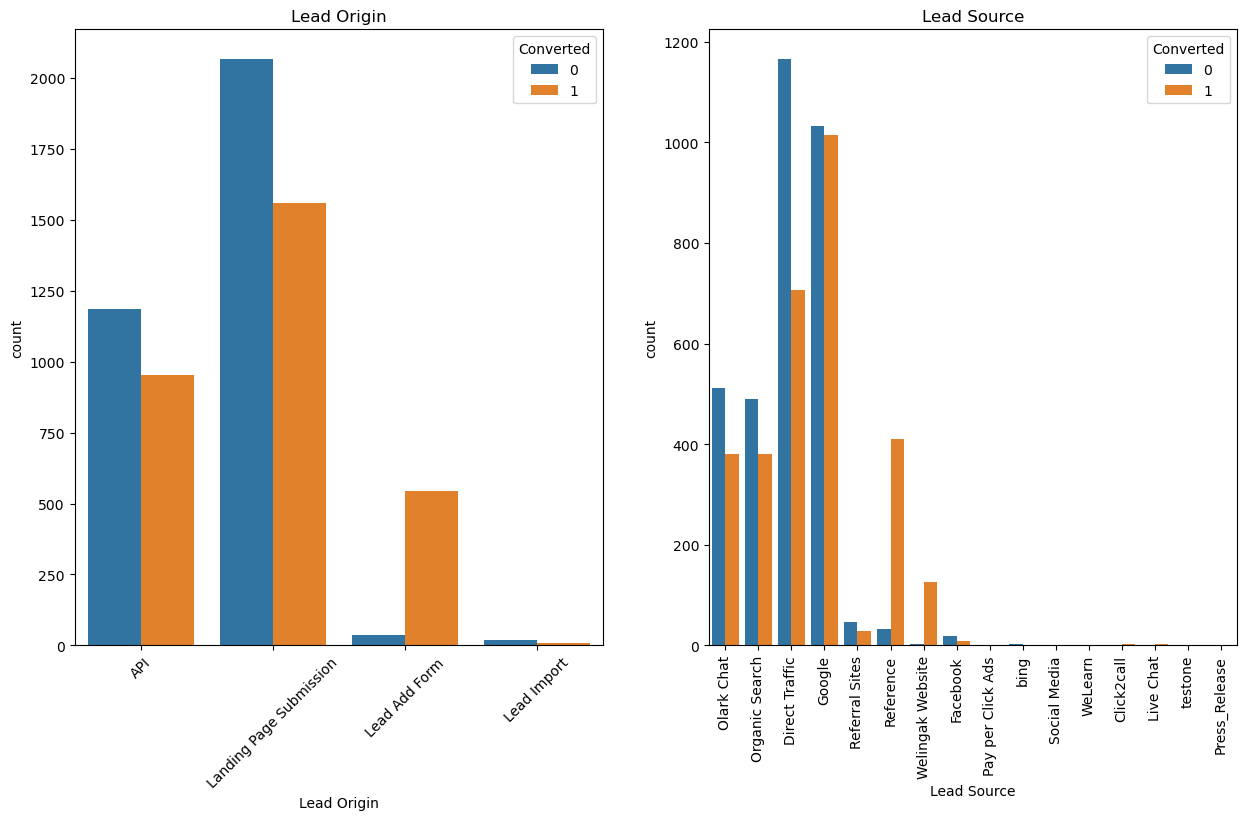

In [29]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead).tick_params(axis='x', rotation = 45)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')


plt.show()

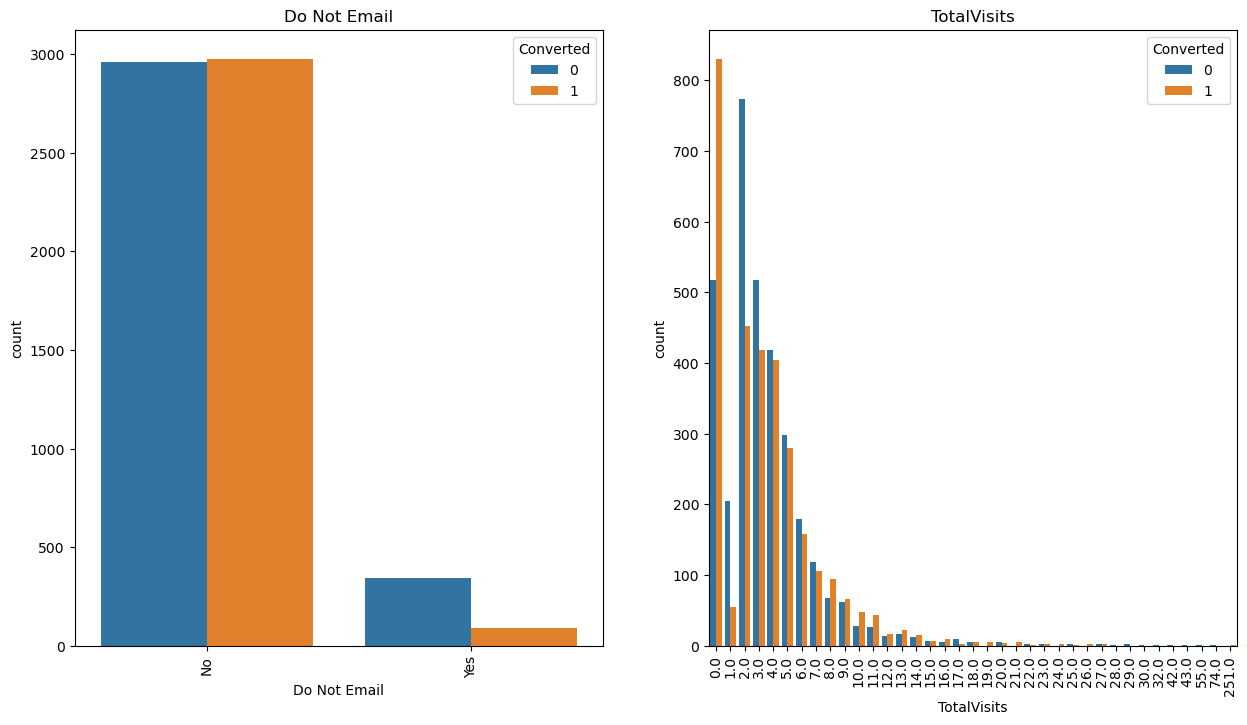

In [30]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='TotalVisits', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('TotalVisits')
plt.show()

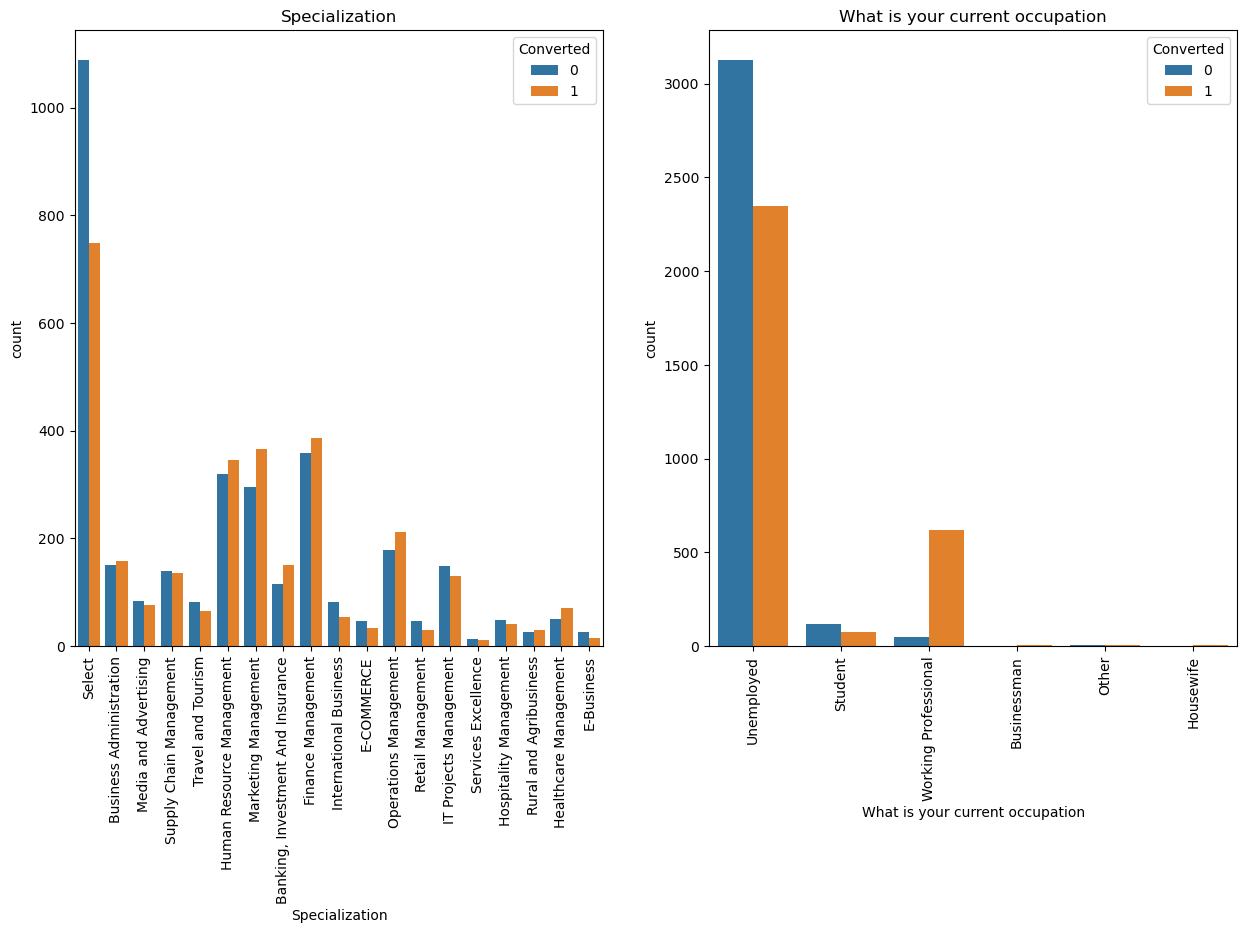

In [31]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.show()

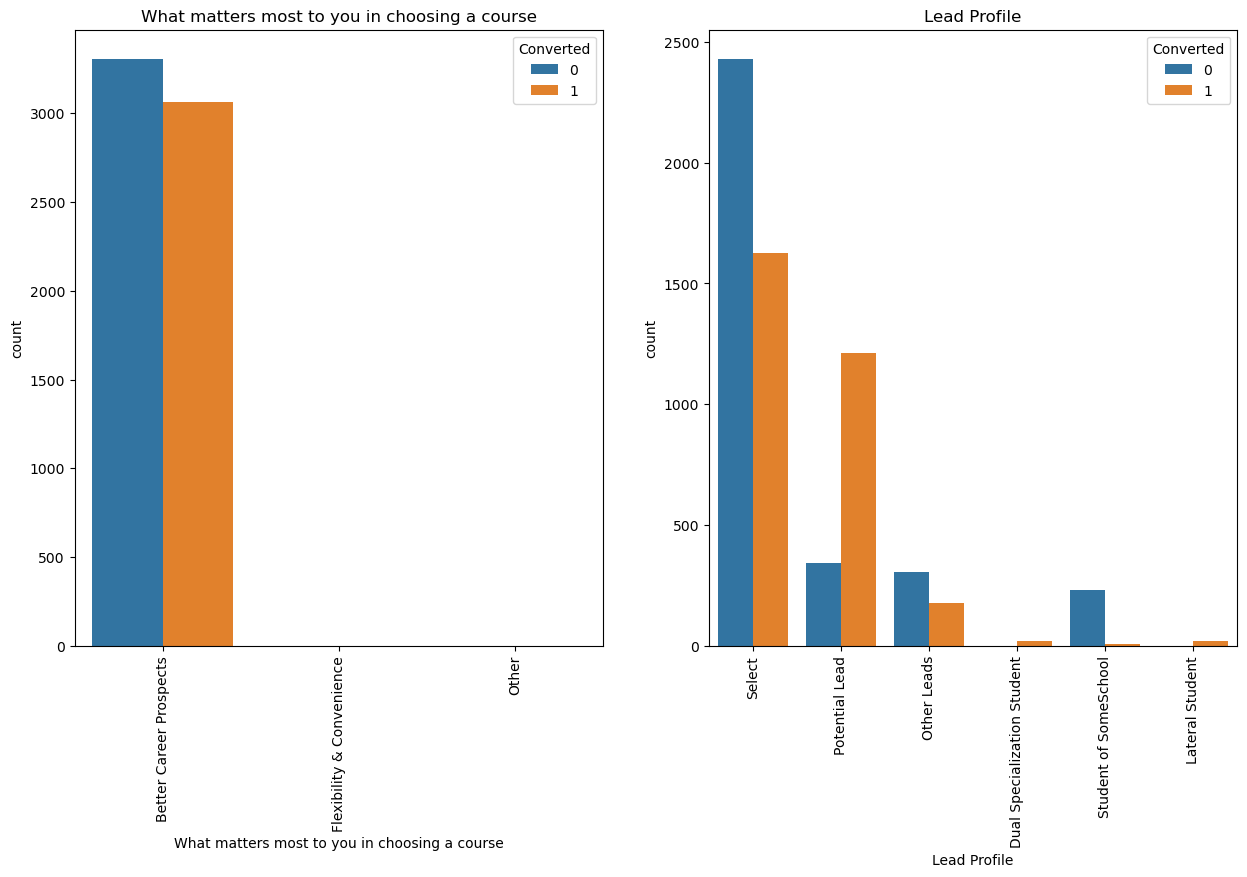

In [32]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Lead Profile', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Lead Profile')

plt.show()

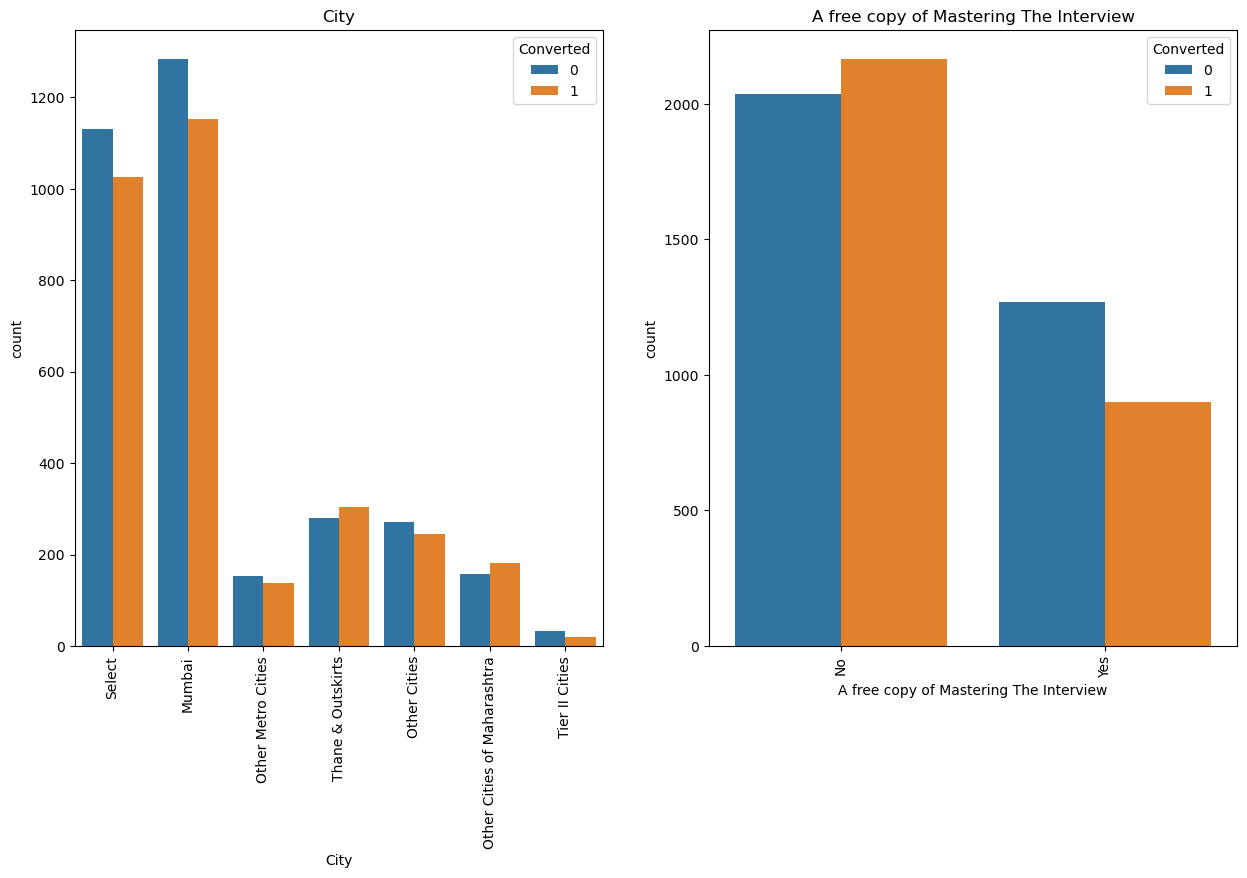

In [33]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(x='City', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('City')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.show()

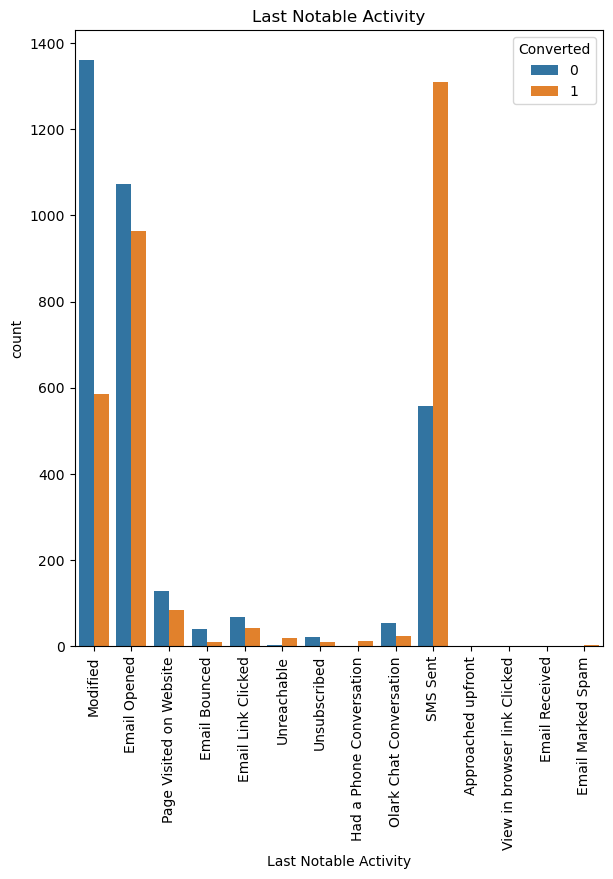

In [34]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

The data is now clean and ready to be prepared for classification model

## Data Preparation

Creating dummy columns

In [35]:
dummy =pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Do Not Email','What is your current occupation', 'What matters most to you in choosing a course',
           'A free copy of Mastering The Interview', 'Last Notable Activity', 'Specialization', 'Lead Profile', 'City']], drop_first = True)
lead1 = pd.concat([lead,dummy], axis = 1)

In [36]:
lead = lead1.drop(['Lead Origin', 'Lead Source', 'Do Not Email','What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity', 'Specialization', 'Lead Profile', 'City', 
                   'Specialization_Select', 'Lead Profile_Select', 'City_Select', 'What matters most to you in choosing a course'],1)

In [37]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
count,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000
mean,0.481011,3.606717,535.279190,2.479565,0.568738,0.091180,0.004237,0.293942,0.004394,0.321406,0.000314,0.139987,0.136535,0.000157,0.000157,0.069523,0.011613,0.000314,0.000157,0.020245,0.000471,0.000157,0.068110,0.001412,0.002354,0.030289,0.859228,0.105618,0.000157,0.000157,0.340709,0.007690,0.017263,0.000314,0.319837,0.000157,0.002040,0.305556,0.011927,0.033271,0.293315,0.003453,0.004865,0.000157,0.048650,0.006748,0.012555,0.116918,0.019146,0.014124,0.104363,0.043628,0.021343,0.104049,0.025267,0.061362,0.012241,0.008945,0.003923,0.043158,0.023384,0.003296,0.075643,0.243879,0.037665,0.080979,0.053045,0.045355,0.091651,0.008318
std,0.499678,4.852274,565.402288,2.166345,0.495291,0.287888,0.064961,0.455602,0.066148,0.467053,0.017715,0.347001,0.343383,0.012527,0.012527,0.254361,0.107146,0.017715,0.012527,0.140848,0.021695,0.012527,0.251955,0.037559,0.048465,0.171394,0.347814,0.30

Checking if there are any object values which need to be changed. All the values are integer or float tye and dummies are unit

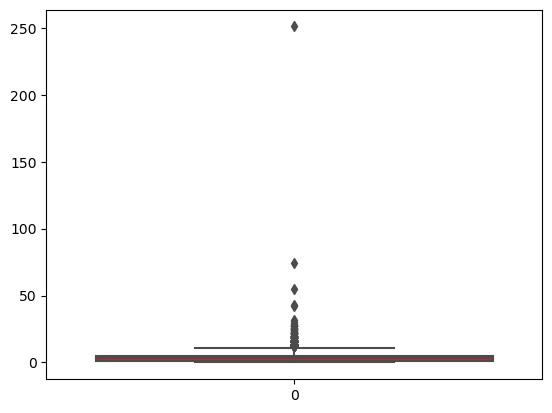

In [39]:
sns.boxplot(lead.TotalVisits, color = 'red')
plt.show()

Checked for outliers but the values are mostly continuous and there are no serious outliers in the data

#### Train- Test split

In [40]:
X = lead.drop(['Converted'], 1)
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [41]:
X.shape

(6372, 69)

In [42]:
y.shape

(6372,)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
4170,4.0,929,4.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6812,16.0,1226,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7717,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
207,5.0,358,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2044,2.0,371,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
X_train.shape

(4460, 69)

In [45]:
y_train.shape

(4460,)

## Feature Scaling

In [46]:
scaler = StandardScaler()
num_vars = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
4170,0.065399,0.701078,0.731572,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6812,2.347130,1.228050,-0.229986,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7717,-0.695177,-0.947262,-1.191544,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
207,0.255544,-0.312057,1.212351,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2044,-0.314889,-0.288991,-0.229986,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Converting rate

In [47]:
converted = (sum(lead['Converted'])/len(lead['Converted']))*100
converted

48.10106716886378

### Checking correlations

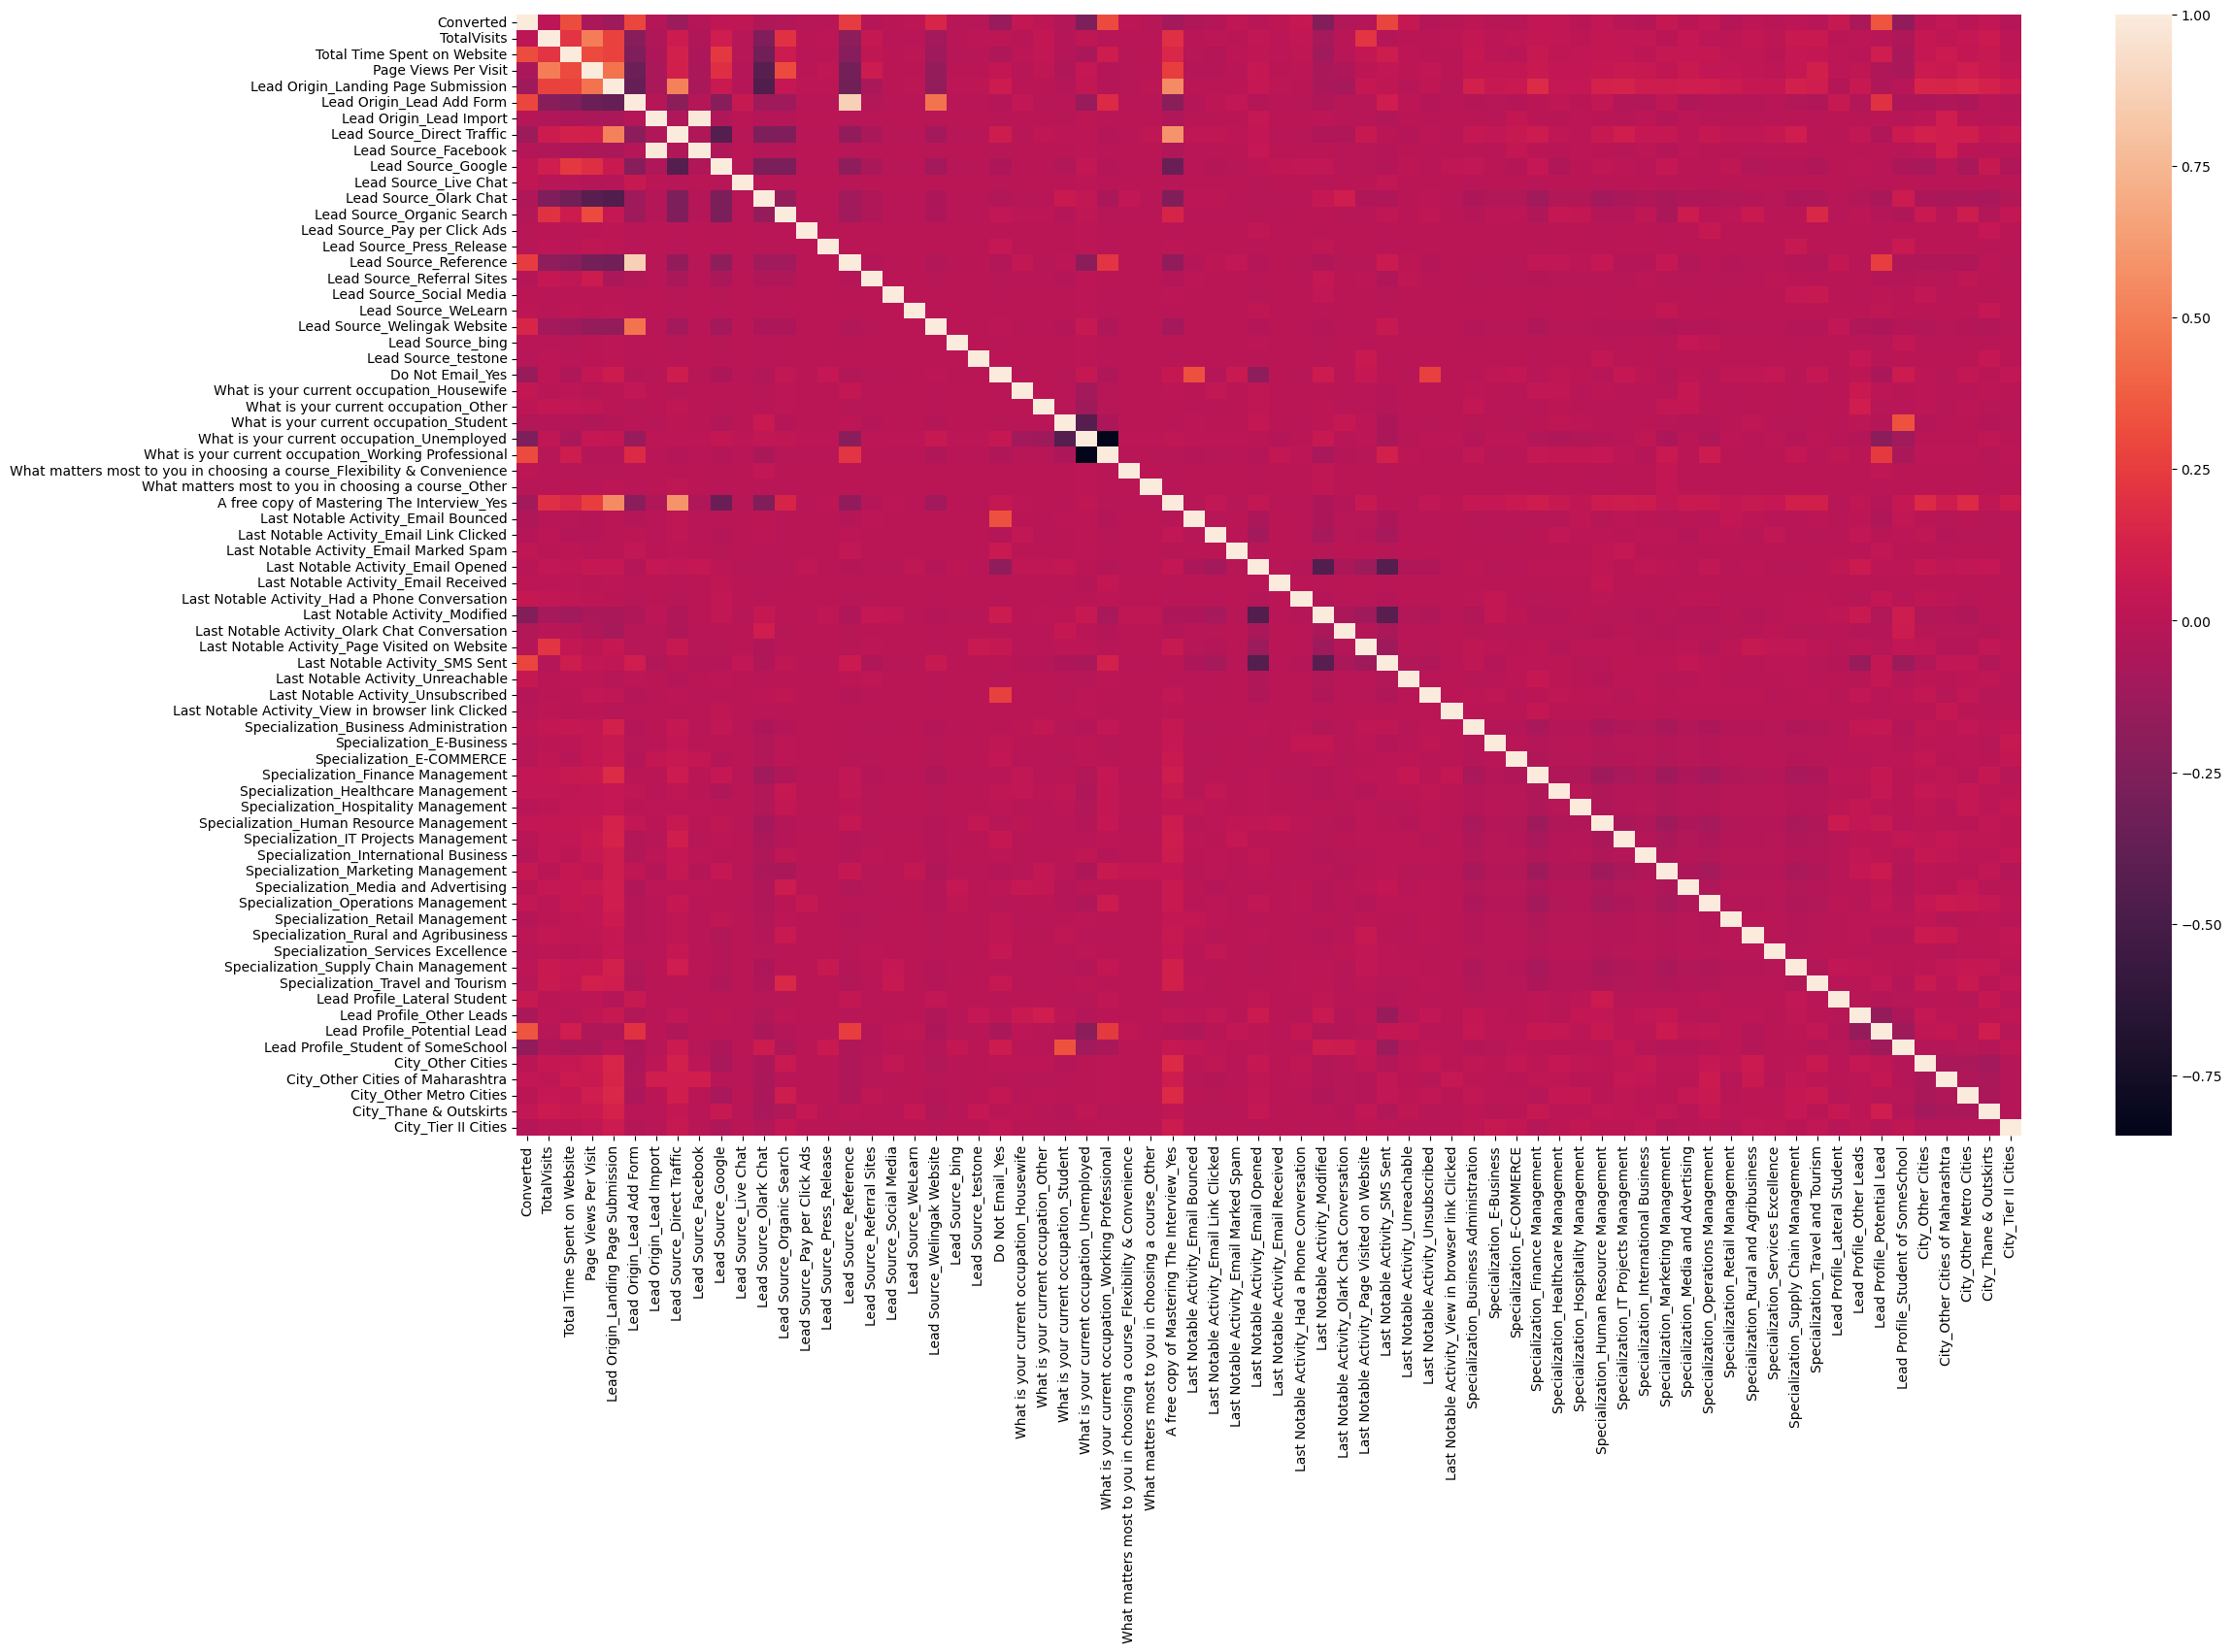

In [48]:
plt.figure(figsize = (25,15))
sns.heatmap(lead.corr())
plt.show()

## Model Building

In [49]:
logreg = LogisticRegression()

rfe = RFE(estimator = logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [50]:
col = X_train.columns[rfe.support_]

In [51]:
X_train = X_train[col]

In [52]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1918.5
Date:                Tue, 19 Dec 2023   Deviance:                       3837.0
Time:                        10:41:36   Pearson chi2:                 4.61e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4081
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.8774      0.188      4.657      0.000       0.508       1.247
Total Time Spent on Website                        1.1056      0.048     22.911      0.000       1.011       1.200
Lead Origin_Lead Add Form                          1.0654      0.984      1.082      0.279      -0.864       2.995
Lead Source_Olark Chat                             1.4648      0.119     12.327      0.000       1.232       1.698
Lead Source_Reference                              2.2334      1.011      2.209      0.027       0.251       4.215
Lead Source_Welingak Website                       5.3393      1.409      3.788      0.000       2.577       8.102
Do Not Email_Yes                                  -1.2457      0.194     -6.428      0.000      -1.626      -0.866
What is your current occupation_Student           -1.6634      0.329     -5.049      0.000      -2.309      -1.018
What is your current occupation_Unemployed        -2.2589      0.190    -11.919      0.000      -2.630      -1.887
Last Notable Activity_Had a Phone Conversation    23.8484   1.93e+04      0.001      0.999   -3.78e+04    3.78e+04
Last Notable Activity_SMS Sent                     1.3315      0.090     14.859      0.000       1.156       1.507
Last Notable Activity_Unreachable                  2.5928      0.820      3.163      0.002       0.986       4.200
Specialization_Services Excellence                -1.5482      0.941     -1.645      0.100      -3.393       0.297
Lead Profile_Lateral Student                      23.5168   1.77e+04      0.001      0.999   -3.47e+04    3.47e+04
Lead Profile_Potential Lead                        1.4817      0.101     14.732      0.000       1.285       1.679
Lead Profile_Student of SomeSchool                -3.2139      0.612     -5.255      0.000      -4.413      -2.015
==================================================================================================================
"""

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,70.11
3,Lead Source_Reference,54.43
4,Lead Source_Welingak Website,16.69
7,What is your current occupation_Unemployed,1.76
13,Lead Profile_Potential Lead,1.41
9,Last Notable Activity_SMS Sent,1.39
2,Lead Source_Olark Chat,1.36
0,Total Time Spent on Website,1.29
14,Lead Profile_Student of SomeSchool,1.19
6,What is your current occupation_Student,1.17


In [54]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [55]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1927.6
Date:                Tue, 19 Dec 2023   Deviance:                       3855.2
Time:                        10:41:37   Pearson chi2:                 4.62e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4057
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.8880      0.188      4.721      0.000       0.519       1.257
Total Time Spent on Website                    1.0998      0.048     22.873      0.000       1.006       1.194
Lead Origin_Lead Add Form                      1.0541      0.984      1.071      0.284      -0.875       2.983
Lead Source_Olark Chat                         1.4483      0.119     12.219      0.000       1.216       1.681
Lead Source_Reference                          2.2251      1.011      2.201      0.028       0.244       4.207
Lead Source_Welingak Website                   5.3354      1.409      3.786      0.000       2.573       8.097
Do Not Email_Yes                              -1.2524      0.194     -6.469      0.000      -1.632      -0.873
What is your current occupation_Student       -1.6706      0.329     -5.075      0.000      -2.316      -1.025
What is your current occupation_Unemployed    -2.2558      0.189    -11.919      0.000      -2.627      -1.885
Last Notable Activity_SMS Sent                 1.3200      0.089     14.756      0.000       1.145       1.495
Last Notable Activity_Unreachable              2.5752      0.820      3.141      0.002       0.968       4.182
Specialization_Services Excellence            -1.5531      0.940     -1.652      0.099      -3.396       0.290
Lead Profile_Lateral Student                  23.5083   1.77e+04      0.001      0.999   -3.47e+04    3.47e+04
Lead Profile_Potential Lead                    1.4935      0.100     14.887      0.000       1.297       1.690
Lead Profile_Student of SomeSchool            -3.2141      0.611     -5.258      0.000      -4.412      -2.016
==============================================================================================================
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,70.11
3,Lead Source_Reference,54.43
4,Lead Source_Welingak Website,16.69
7,What is your current occupation_Unemployed,1.76
12,Lead Profile_Potential Lead,1.41
8,Last Notable Activity_SMS Sent,1.39
2,Lead Source_Olark Chat,1.36
0,Total Time Spent on Website,1.29
13,Lead Profile_Student of SomeSchool,1.19
6,What is your current occupation_Student,1.17


In [57]:
X_train.drop('Lead Profile_Lateral Student', axis = 1, inplace = True)

In [58]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1936.6
Date:                Tue, 19 Dec 2023   Deviance:                       3873.2
Time:                        10:41:37   Pearson chi2:                 4.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4033
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.9108      0.188      4.856      0.000       0.543       1.278
Total Time Spent on Website                    1.1019      0.048     22.955      0.000       1.008       1.196
Lead Origin_Lead Add Form                      1.7256      0.944      1.827      0.068      -0.125       3.576
Lead Source_Olark Chat                         1.4404      0.118     12.182      0.000       1.209       1.672
Lead Source_Reference                          1.5839      0.972      1.630      0.103      -0.321       3.488
Lead Source_Welingak Website                   4.6724      1.381      3.383      0.001       1.966       7.379
Do Not Email_Yes                              -1.2407      0.192     -6.456      0.000      -1.617      -0.864
What is your current occupation_Student       -1.6863      0.329     -5.127      0.000      -2.331      -1.042
What is your current occupation_Unemployed    -2.2647      0.189    -11.997      0.000      -2.635      -1.895
Last Notable Activity_SMS Sent                 1.3086      0.089     14.655      0.000       1.134       1.484
Last Notable Activity_Unreachable              2.5648      0.820      3.129      0.002       0.958       4.171
Specialization_Services Excellence            -1.5669      0.941     -1.666      0.096      -3.411       0.277
Lead Profile_Potential Lead                    1.4791      0.100     14.762      0.000       1.283       1.675
Lead Profile_Student of SomeSchool            -3.2234      0.611     -5.273      0.000      -4.421      -2.025
==============================================================================================================
"""

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,69.34
3,Lead Source_Reference,53.94
4,Lead Source_Welingak Website,16.54
7,What is your current occupation_Unemployed,1.75
11,Lead Profile_Potential Lead,1.40
8,Last Notable Activity_SMS Sent,1.39
2,Lead Source_Olark Chat,1.36
0,Total Time Spent on Website,1.29
12,Lead Profile_Student of SomeSchool,1.19
6,What is your current occupation_Student,1.17


In [60]:
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [61]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1938.3
Date:                Tue, 19 Dec 2023   Deviance:                       3876.7
Time:                        10:41:37   Pearson chi2:                 4.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.9112      0.188      4.860      0.000       0.544       1.279
Total Time Spent on Website                    1.0983      0.048     22.934      0.000       1.004       1.192
Lead Source_Olark Chat                         1.4376      0.118     12.174      0.000       1.206       1.669
Lead Source_Reference                          3.3024      0.246     13.422      0.000       2.820       3.785
Lead Source_Welingak Website                   6.3907      1.012      6.316      0.000       4.408       8.374
Do Not Email_Yes                              -1.2438      0.192     -6.476      0.000      -1.620      -0.867
What is your current occupation_Student       -1.6859      0.329     -5.128      0.000      -2.330      -1.041
What is your current occupation_Unemployed    -2.2610      0.189    -11.981      0.000      -2.631      -1.891
Last Notable Activity_SMS Sent                 1.3099      0.089     14.671      0.000       1.135       1.485
Last Notable Activity_Unreachable              2.5600      0.819      3.124      0.002       0.954       4.166
Specialization_Services Excellence            -1.5676      0.940     -1.668      0.095      -3.410       0.275
Lead Profile_Potential Lead                    1.4790      0.100     14.764      0.000       1.283       1.675
Lead Profile_Student of SomeSchool            -3.2233      0.611     -5.275      0.000      -4.421      -2.026
==============================================================================================================
"""

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,1.75
10,Lead Profile_Potential Lead,1.40
7,Last Notable Activity_SMS Sent,1.39
1,Lead Source_Olark Chat,1.36
2,Lead Source_Reference,1.31
0,Total Time Spent on Website,1.29
11,Lead Profile_Student of SomeSchool,1.19
5,What is your current occupation_Student,1.17
4,Do Not Email_Yes,1.09
3,Lead Source_Welingak Website,1.07


In [63]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4170    0.674817
6812    0.499734
7717    0.278362
207     0.155442
2044    0.158797
3330    0.906979
6498    0.005430
2085    0.982023
6260    0.026579
19      0.099822
dtype: float64

In [64]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.67481684, 0.49973437, 0.27836173, 0.15544238, 0.15879722,
       0.9069787 , 0.00543022, 0.98202292, 0.02657851, 0.09982227])

##### DataFrame for prediction probabilies

In [65]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.674817
1,1,0.499734
2,1,0.278362
3,0,0.155442
4,0,0.158797


In [66]:
y_train_pred_final['Predicted']= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.5 else 0 )
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.674817,1
1,1,0.499734,0
2,1,0.278362,0
3,0,0.155442,0
4,0,0.158797,0


## Model Evaluation

In [67]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[1934  385]
 [ 508 1633]]


In [68]:
#  Confusion matrix
#  Predicted         not churn        churn
#  Actual                        
#  not churn          1934(TN)        385(FP)
#  churn              508(FN)        1633(TP)

Accuracy

In [69]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7997757847533632


Sensitivity

In [70]:
# TP/TP+FN
1633/(1633+508)

0.7627276973376926

Specificity

In [71]:
# TN/TN+FP
1934/(1934+385)

0.8339801638637344

## Optimal Cutoff by ROC curve

In [72]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [73]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

#### ROC Curve

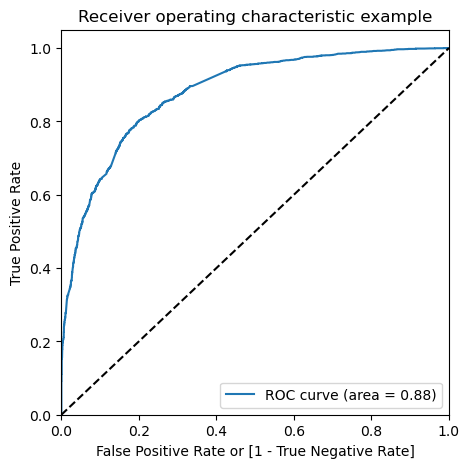

In [74]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

ROC is trade off between Sensitivity and Specificity  

Since the area under the curve is 0.88 hence this is a good model

In [75]:
## column for all the probabilities

In [76]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.674817,1,1,1,1,1,1,1,1,0,0,0
1,1,0.499734,0,1,1,1,1,1,0,0,0,0,0
2,1,0.278362,0,1,1,1,0,0,0,0,0,0,0
3,0,0.155442,0,1,1,0,0,0,0,0,0,0,0
4,0,0.158797,0,1,1,0,0,0,0,0,0,0,0


In [77]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.480045  1.000000  0.000000
0.1   0.1  0.594395  0.988790  0.230272
0.2   0.2  0.734305  0.953293  0.532126
0.3   0.3  0.778475  0.880897  0.683915
0.4   0.4  0.795291  0.818776  0.773609
0.5   0.5  0.799776  0.762728  0.833980
0.6   0.6  0.778475  0.673517  0.875377
0.7   0.7  0.764574  0.592714  0.923243
0.8   0.8  0.730942  0.487623  0.955584
0.9   0.9  0.673991  0.344232  0.978439


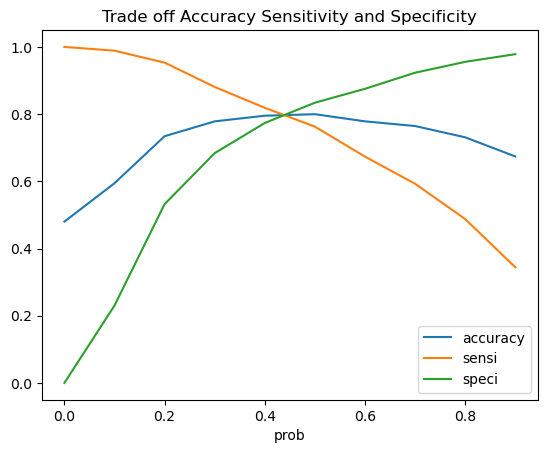

In [78]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('Trade off Accuracy Sensitivity and Specificity')
plt.show()

So the cutoff is somewhat near 0.4 so the optimal cutoff is 0.4

In [79]:
y_train_pred_final['Final_Prediction'] =  y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.4 else 0 )
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Prediction
0,1,0.674817,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.499734,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.278362,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.155442,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.158797,0,1,1,0,0,0,0,0,0,0,0,0


In [80]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Prediction)
print(confusion1)

[[1794  525]
 [ 388 1753]]


Accuracy

In [81]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Prediction))

0.7952914798206278


In [82]:
#  Confusion matrix
#  Predicted         not churn        churn
#  Actual                        
#  not churn          1794(TN)        525(FP)
#  churn              388(FN)        1753(TP)

In [83]:
TP = confusion1[1,1]
TN = confusion1[0,0]
FP = confusion1[0,1]
FN = confusion1[1,0]

Sensitivity

In [84]:
TP/(TP+FN)

0.8187762727697337

Specificity


In [85]:
TN/(TN+FP)

0.7736093143596378

So the model looks pretty good with high sensitivity given by the optimal cutoff. 

## Making Predictions on Test set

Scaling

In [86]:
num_vars = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [87]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Specialization_Services Excellence,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
8402,1.558072,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8782,0.044581,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6199,0.724144,0,0,0,0,0,0,1,0,1,0,0,0,0,0
6482,-0.947262,0,1,0,0,0,0,1,0,0,0,0,0,1,0
6026,-0.947262,1,0,1,0,0,0,1,0,0,0,0,0,0,0


In [88]:
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Specialization_Services Excellence,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
8402,1.0,1.558072,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8782,1.0,0.044581,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6199,1.0,0.724144,0,0,0,0,0,0,1,0,1,0,0,0,0,0
6482,1.0,-0.947262,0,1,0,0,0,0,1,0,0,0,0,0,1,0
6026,1.0,-0.947262,1,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5528,1.0,-0.688212,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3055,1.0,1.267085,0,0,0,0,0,0,1,0,1,0,0,0,0,0
7220,1.0,1.902290,0,0,0,0,0,0,1,0,0,0,0,1,0,0
5135,1.0,1.825994,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [89]:
X_test_sm.drop(['Last Notable Activity_Had a Phone Conversation', 'Lead Profile_Lateral Student', 'Lead Origin_Lead Add Form'], axis = 1, inplace = True)

In [90]:
y_test_pred = res.predict(X_test_sm)

In [91]:
y_test_pred[:10]

8402    0.589378
8782    0.214022
6199    0.680351
6482    0.628650
6026    0.713452
5991    0.655719
3812    0.323513
6307    0.109875
7344    0.695824
4171    0.318833
dtype: float64

In [92]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [93]:
y_test_df = pd.DataFrame(y_test)

In [94]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [95]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [96]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Converted_Prob'})

In [97]:
y_pred_final.head()

,Converted,Converted_Prob
0,1,0.589378
1,0,0.214022
2,1,0.680351
3,1,0.628650
4,1,0.713452


In [98]:
y_pred_final['Final_pred'] = y_pred_final.Converted_Prob.map(lambda x: 1if x>0.4 else 0)
y_pred_final[:10]

,Converted,Converted_Prob,Final_pred
0,1,0.589378,1
1,0,0.214022,0
2,1,0.680351,1
3,1,0.628650,1
4,1,0.713452,1
5,1,0.655719,1
6,0,0.323513,0
7,0,0.109875,0
8,0,0.695824,1
9,1,0.318833,0


Accuracy

In [99]:
print(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_pred))

0.7881799163179917


In [100]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_pred)
confusion_test

array([[757, 231],
       [174, 750]], dtype=int64)

In [101]:
TP = confusion_test[1,1]
TN = confusion_test[0,0]
FP = confusion_test[0,1]
FN = confusion_test[1,0]

Sensitivity

In [102]:
TP/(TP+FN)

0.8116883116883117

Specificity

In [103]:
TN/(TN+FP)

0.7661943319838057

The predicted model has an accuracy score 0.79 approx which is pretty decent score and shows that the predixted model is very good. The sensitivity and specificity values also show the model is good.

Precision

In [104]:
TP/(TP+FP)

0.764525993883792

Recall

In [105]:
TP/(TP+FN)

0.8116883116883117

The precision

In [106]:
y_pred_final['Lead Score']=round(y_pred_final.Converted_Prob*100,0)
y_pred_final[:20]

,Converted,Converted_Prob,Final_pred,Lead Score
0,1,0.589378,1,59.0
1,0,0.214022,0,21.0
2,1,0.680351,1,68.0
3,1,0.628650,1,63.0
4,1,0.713452,1,71.0
5,1,0.655719,1,66.0
6,0,0.323513,0,32.0
7,0,0.109875,0,11.0
8,0,0.695824,1,70.0
9,1,0.318833,0,32.0


Conversion rate of the predicted set

In [107]:
conversion_rate = (sum(y_pred_final['Final_pred'])/len(y_pred_final['Final_pred']))*100
conversion_rate

51.30753138075313

In [108]:
conversion_rate - 30

21.307531380753133

The lead conversion rate has increased by 21%, previously it was 30%.